# Case Study On Titanic Data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("C:/Users/SUNAYANA/Downloads/titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
x=data['Age'].median()

In [7]:
data['Age'].fillna(x,inplace=True)

In [8]:
s=data['Embarked'].mode()[0]
s

'S'

In [9]:
data['Embarked'].fillna('S',inplace=True)

In [10]:
data.dropna(axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data["Sex"] = l.fit_transform(data["Sex"])
data["Embarked"] = l.fit_transform(data["Embarked"])
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

## Visualisation

C:\Users\SUNAYANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


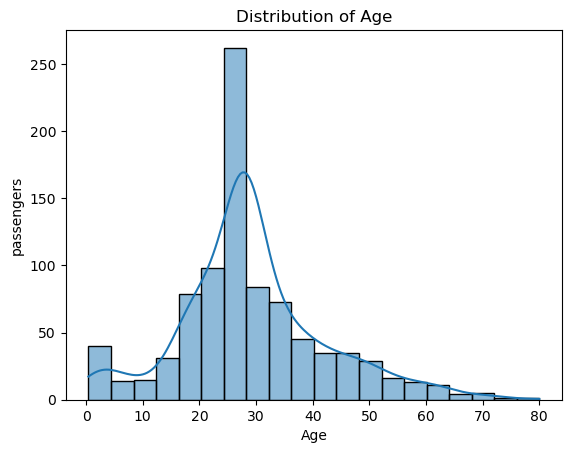

In [14]:
# Histogram
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data["Age"], bins=20, kde=True)

# Customize plot
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('passengers')
plt.show()

* Interpretation:                       
  Most passengers fall within the age range of 20 to 30 years old, as indicated by the tallest bar.                  
The frequency decreases as age increases, with very few passengers above 70 years old           .

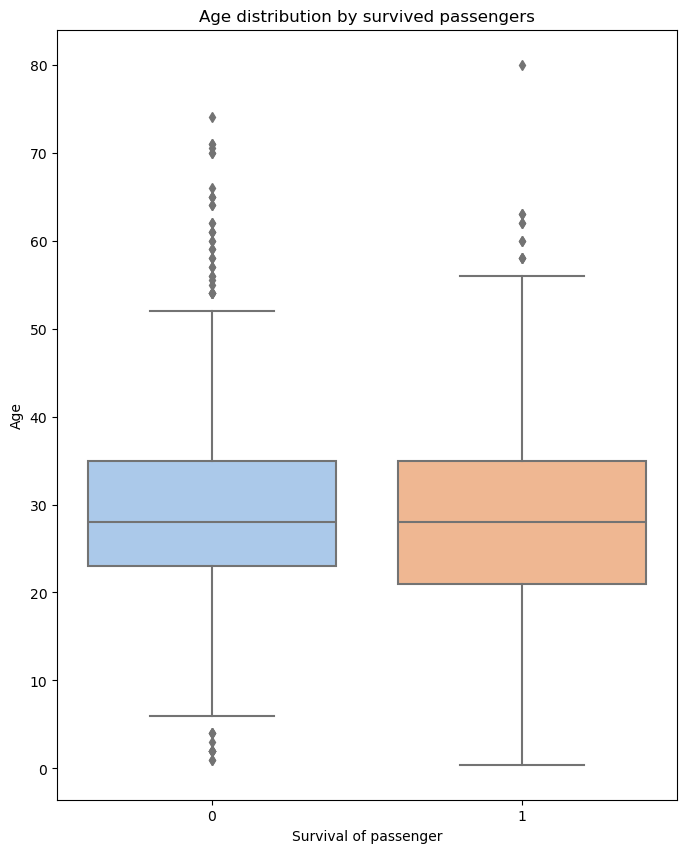

In [15]:
# Boxplot
plt.figure(figsize=(8, 10))
sns.boxplot(data=data, x='Survived', y='Age', palette='pastel')
plt.title('Age distribution by survived passengers')
plt.xlabel('Survival of passenger')
plt.ylabel('Age')
plt.show()

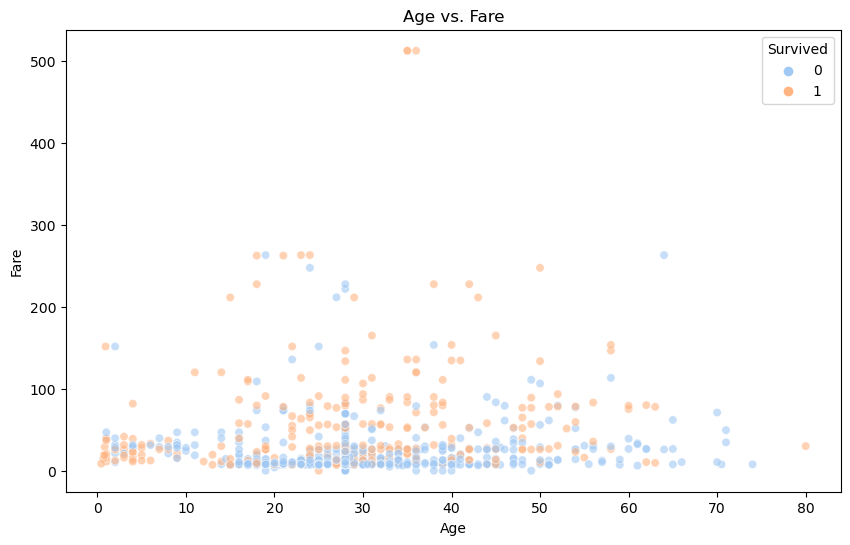

In [16]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='pastel', alpha=0.6)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

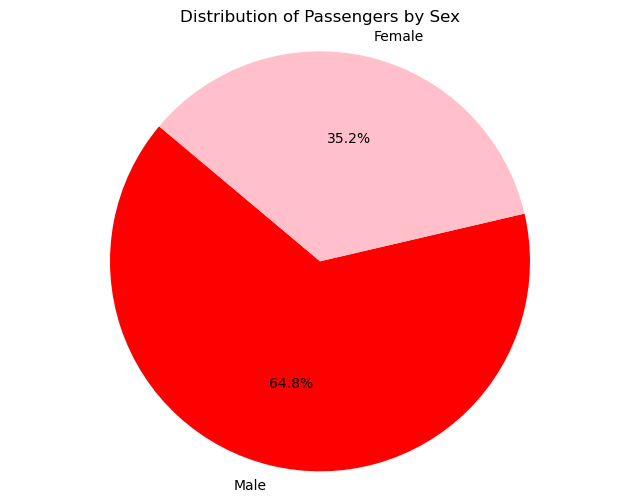

In [17]:
# pie chart
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
y=["Male","Female"]
plt.pie(sex_counts, labels=y,autopct='%1.1f%%',startangle=140, colors=['Red','Pink'])
plt.title('Distribution of Passengers by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

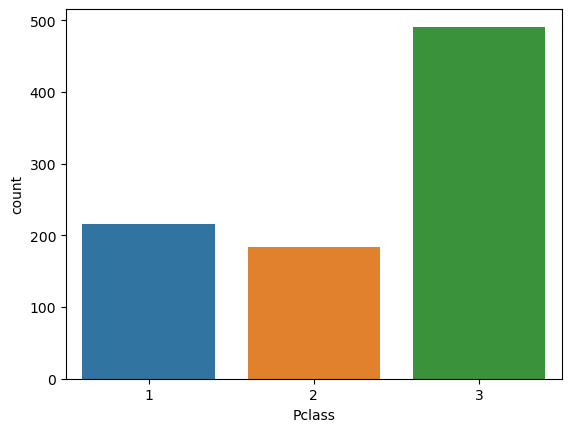

In [18]:
import seaborn as sns
ax = sns.countplot(x="Pclass", data=data)

In [19]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

 ## Model building

* Dependent Variable : Passenger Survival
* Independent variable : Age, Sex, Fare, Embarked, SibSp, Parch	

In [74]:
# Train and test split
from sklearn.model_selection import train_test_split
X=data[["Age","Sex","Fare","Embarked","SibSp","Parch"]]
Y=data["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)
X_train, X_test, Y_train, Y_test

(      Age  Sex      Fare  Embarked  SibSp  Parch
 887  19.0    0   30.0000         2      0      0
 416  34.0    0   32.5000         2      1      1
 479   2.0    0   12.2875         2      0      1
 134  25.0    1   13.0000         2      0      0
 588  22.0    1    8.0500         2      0      0
 ..    ...  ...       ...       ...    ...    ...
 400  39.0    1    7.9250         2      0      0
 118  24.0    1  247.5208         0      0      1
 701  35.0    1   26.2875         2      0      0
 206  32.0    1   15.8500         2      1      0
 867  31.0    1   50.4958         2      0      0
 
 [712 rows x 6 columns],
       Age  Sex     Fare  Embarked  SibSp  Parch
 126  28.0    1   7.7500         1      0      0
 354  28.0    1   7.2250         0      0      0
 590  35.0    1   7.1250         2      0      0
 509  26.0    1  56.4958         2      0      0
 769  32.0    1   8.3625         2      0      0
 ..    ...  ...      ...       ...    ...    ...
 732  28.0    1   0.0000      

* naive bay’s algorithms

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

## Model Evaluation

* Naive bayes algorithm

In [76]:
# Accuracy
from sklearn.metrics import accuracy_score
accur_score=accuracy_score(Y_test,y_pred)
print("Accuracy:",accur_score)

Accuracy: 0.8268156424581006


In [77]:
# Classification report
from sklearn.metrics import classification_report
report=classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



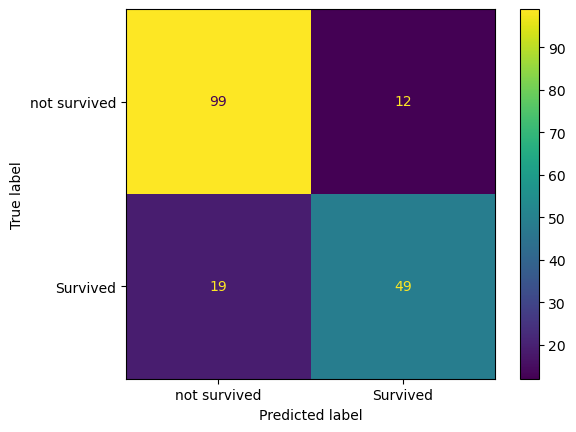

In [78]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred,labels=gnb.classes_)
cm
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

* kNN Algorithm

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [80]:
ky_pred=classifier.predict(X_test)
ky_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [81]:
# Accuracy
from sklearn.metrics import accuracy_score
knn_accur_score=accuracy_score(Y_test,ky_pred)
print("Accuracy:",knn_accur_score)

Accuracy: 0.770949720670391


In [82]:
# Classification report
from sklearn.metrics import classification_report
knn_report=classification_report(Y_test,ky_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.72      0.65      0.68        68

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



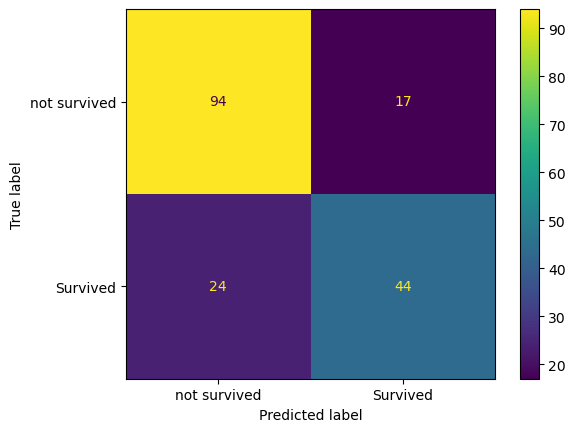

In [83]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,ky_pred,labels=gnb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

* Decision tree

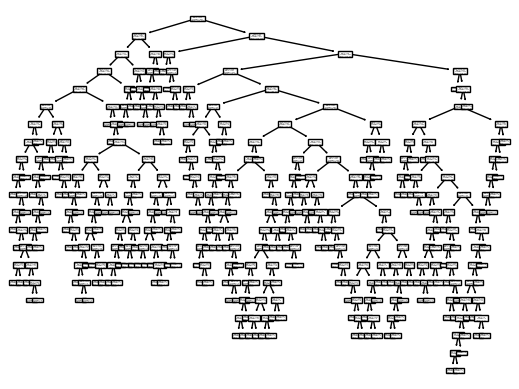

In [84]:
from sklearn i v vmport tree
from sklearn.tree import DecisionTreeClassifier
x=["Age","Sex","Fare","Embarked","SibSp","Parch"]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
tree.plot_tree(dtree,feature_names=x)
plt.show()

In [85]:
d_y_pred=dtree.predict(X_test)
d_y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [86]:
# Accuracy
from sklearn.metrics import accuracy_score
dt_accur_score=accuracy_score(Y_test,d_y_pred)
print("Accuracy:",dt_accur_score)

Accuracy: 0.9720670391061452


In [87]:
# Classification report
from sklearn.metrics import classification_report
dt_report=classification_report(Y_test,d_y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.93      0.96        68

    accuracy                           0.97       179
   macro avg       0.98      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



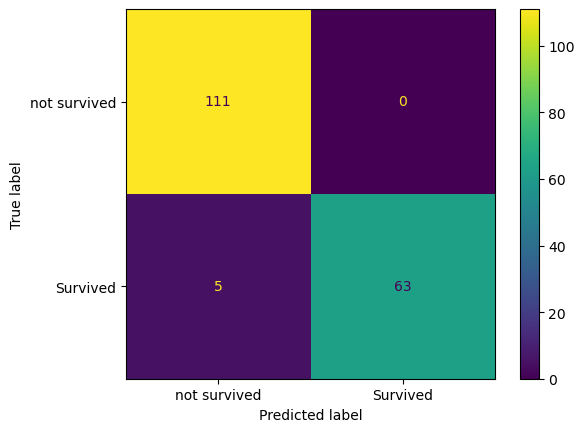

In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,d_y_pred,labels=gnb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

#### Comparison

In [99]:
models={'Navie Bayes':GaussianNB(),'K-Nearst-Neighbors':KNeighborsClassifier(n_neighbors=5),'Decision tree':DecisionTreeClassifier(random_state=5)}
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [100]:
R=[]
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    predict_y=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predict_y)
    precision=precision_score(Y_test,predict_y)
    recall=recall_score(Y_test,predict_y)
    R.append({'Model':model_name,'Accuracy':accuracy,'Precision':precision,'Recall':recall})

In [101]:
import pandas as pd
comparison=pd.DataFrame(R)
print(comparison)

                Model  Accuracy  Precision    Recall
0         Navie Bayes  0.826816   0.803279  0.720588
1  K-Nearst-Neighbors  0.770950   0.721311  0.647059
2       Decision tree  0.804469   0.753846  0.720588
